In [2]:
# Import the necessary packages

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Problem 1.1 (sort of finished)

In [23]:
# Define the SIR model equations

def sir_model(q, t, beta, gamma):
    
    S, I, R = q
    
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    
    dqdt = [dSdt, dIdt, dRdt]
    
    return dqdt

In [4]:
# Solve SIR model with numerical integration

t_1 = np.linspace(0, 100, 100)

sol_1a = odeint(sir_model, (0.9, 0.1, 0), t_1, (0.5, 0.1))

S_1a = sol_1a[:,0]
I_1a = sol_1a[:,1]
R_1a = sol_1a[:,2]

sol_1b = odeint(sir_model, (0.9, 0.1, 0), t_1, (0.3, 0.5)) 

S_1b = sol_1b[:,0]
I_1b = sol_1b[:,1]
R_1b = sol_1b[:,2]

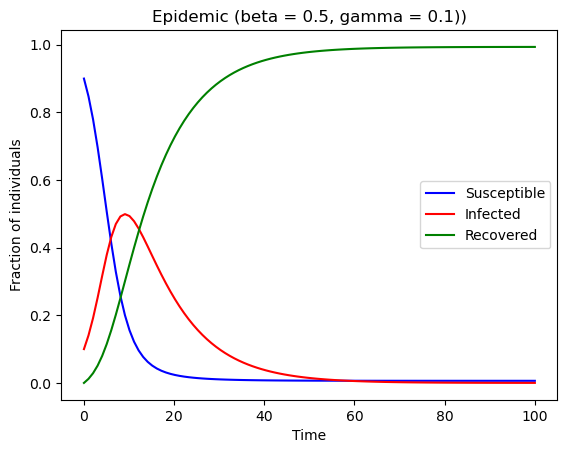

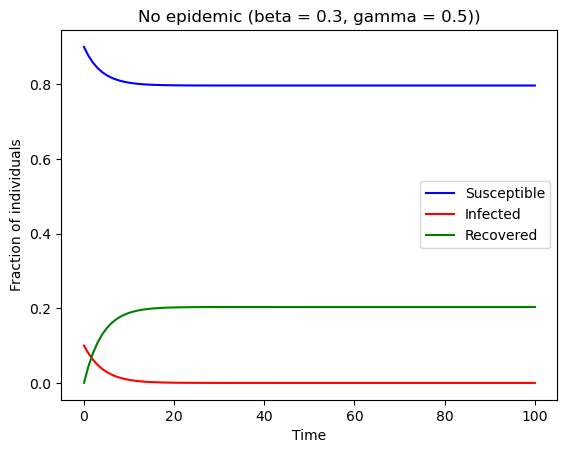

In [5]:
# Plot figures

plt.figure()
plt.title("Epidemic (beta = 0.5, gamma = 0.1))")
plt.plot(t_1, S_1a, 'b', label='Susceptible')
plt.plot(t_1, I_1a, 'r', label='Infected')
plt.plot(t_1, R_1a, 'g', label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of individuals')
plt.legend()

plt.figure()
plt.title("No epidemic (beta = 0.3, gamma = 0.5))")
plt.plot(t_1, S_1b, 'b', label='Susceptible')
plt.plot(t_1, I_1b, 'r', label='Infected')
plt.plot(t_1, R_1b, 'g', label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of individuals')
plt.legend()

plt.show();

We speak of an epidemic when the number of infected people increases. This is the case when the basic reproductive rate R_0 = beta/gamma > 1, i.e. when more people get infected than recover.

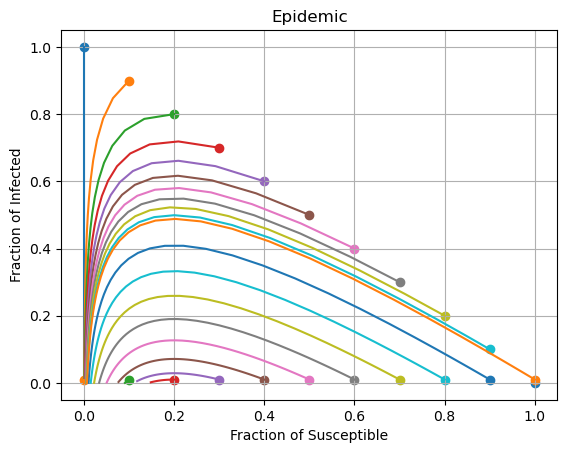

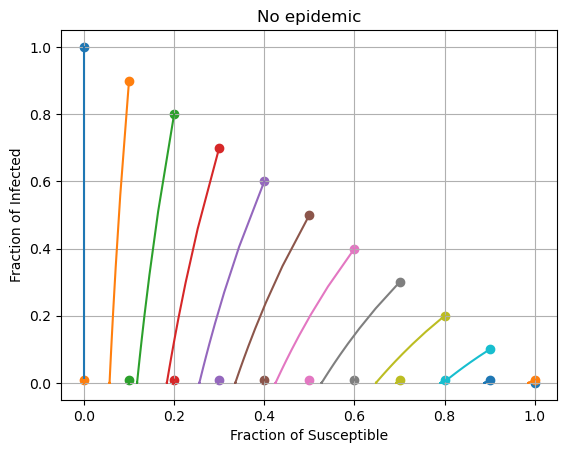

In [41]:
# Phase space diagrams for both scenarios

initial_conditions = []
for i in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    S0 = i
    I0 = 1.0 - i
    R0 = 0.0
    initial_conditions.append((S0, I0, R0))

for j in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    S0 = j
    I0 = 0.01
    R0 = 1-j-0.01
    initial_conditions.append((S0, I0, R0))
        
for condition in initial_conditions:
    S0 = condition[0]
    I0 = condition[1]
    R0 = condition[2]
    q0 = [S0, I0, R0]
    solution = odeint(sir_model, q0, t_1, args=(0.5, 0.1))
    S, I, R = solution.T
    plt.scatter(S0, I0, marker='o')
    plt.plot(S, I)

plt.title('Epidemic')
plt.xlabel('Fraction of Susceptible')
plt.ylabel('Fraction of Infected')
plt.grid()

plt.show()

for condition in initial_conditions:
    S0 = condition[0]
    I0 = condition[1]
    R0 = condition[2]
    q0 = [S0, I0, R0]
    solution = odeint(sir_model, q0, t_1, args=(0.3, 0.5))
    S, I, R = solution.T
    plt.scatter(S0, I0, marker='o')
    plt.plot(S, I)

plt.title('No epidemic')
plt.xlabel('Fraction of Susceptible')
plt.ylabel('Fraction of Infected')
plt.grid()

plt.show()

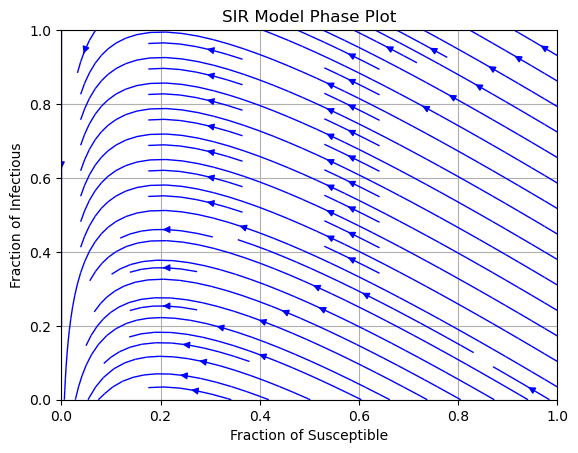

In [39]:
# Create a grid of S and I values
S_values = np.linspace(0, 1, 10)
I_values = np.linspace(0, 1, 10)
S_grid, I_grid = np.meshgrid(S_values, I_values)

# Calculate the derivatives at each point on the grid
dSdt_grid, dIdt_grid, dRdt_grid = sir_model([S_grid, I_grid, 1 - S_grid - I_grid], t_1, 0.5, 0.1)

# Create a phase plot using plt.streamplot
plt.figure()
#plt.scatter(S_grid, I_grid)
plt.streamplot(S_grid, I_grid, dSdt_grid, dIdt_grid, density=1, linewidth=1, color='b', arrowsize=1)
plt.title('SIR Model Phase Plot')
plt.xlabel('Fraction of Susceptible')
plt.ylabel('Fraction of Infectious')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.show()

# Problem 1.2

In [7]:
# Data from boys school

N = 763
X0 = 762
Y0 = 1
Z0 = 0

day = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
number = [1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]

ratio = np.array(number)/N

In [8]:
def infections_school(t, beta, gamma):

    sol = odeint(sir_model, (X0/N, Y0/N, Z0/N), t, (beta, gamma))

    return sol[:,1]

In [9]:
# Fit the data on the school model and estimate the parameters

popt, pcov = curve_fit(infections_school, day, ratio)

In [10]:
popt

array([1.66511386, 0.44760974])

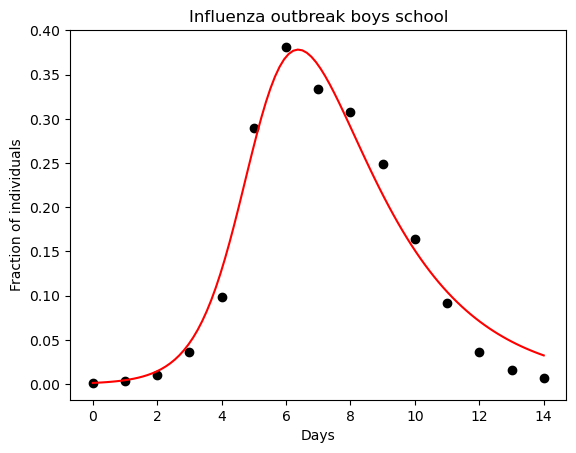

In [11]:
# Plot figures

t_2 = np.linspace(0, 14, 100) # Smaller interval to make a smoother graph

plt.figure()
plt.title("Influenza outbreak boys school")
plt.plot(day, ratio, 'o', color='black')
plt.plot(t_2, infections_school(t_2, *popt), 'r')
plt.xlabel('Days')
plt.ylabel('Fraction of individuals')

plt.show();

Estimate beta = 1.66 and gamma = 0.44

# Problem 1.3 (sort of finished)

In [12]:
sol_1c = odeint(sir_model, ((712)/N, 1/N, 50/N), day, (1.66, 0.44))

S_1c = sol_1c[:,0]
I_1c = sol_1c[:,1]
R_1c = sol_1c[:,2]

sol_1d = odeint(sir_model, (462/N, 1/N, 300/N), day, (1.66, 0.44))

S_1d = sol_1d[:,0]
I_1d = sol_1d[:,1]
R_1d = sol_1d[:,2]

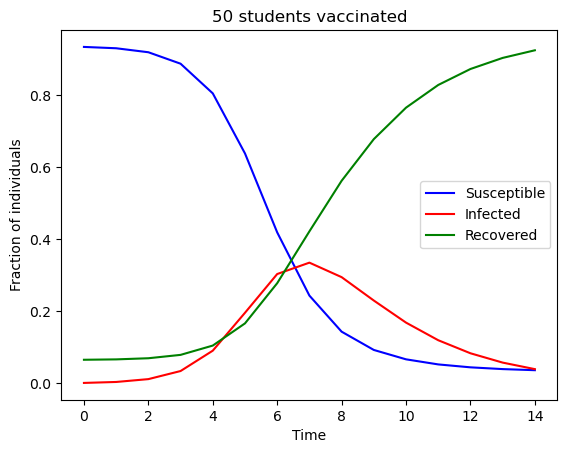

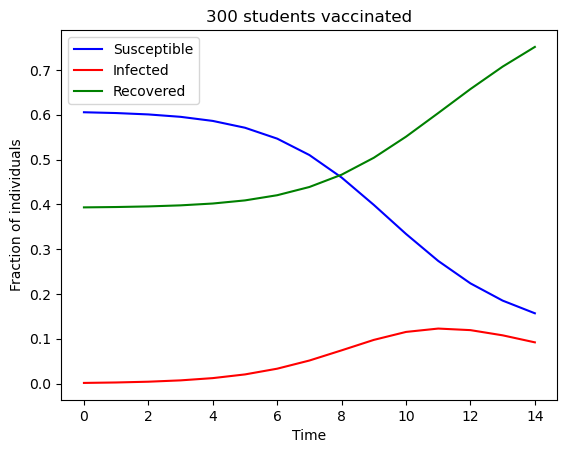

In [13]:
plt.figure()
plt.title("50 students vaccinated")
plt.plot(day, S_1c, 'b', label='Susceptible')
plt.plot(day, I_1c, 'r', label='Infected')
plt.plot(day, R_1c, 'g', label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of individuals')
plt.legend()

plt.figure()
plt.title("300 students vaccinated")
plt.plot(day, S_1d, 'b', label='Susceptible')
plt.plot(day, I_1d, 'r', label='Infected')
plt.plot(day, R_1d, 'g', label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of individuals')
plt.legend()

plt.show()

Nog een keer

# Problem 2.1 (not finished)

In [14]:
# Define the SIR model equations with demography

def sir_model_2a(q, t, beta, gamma, mu):
    
    S, I, R = q
    
    dSdt = mu - beta*S*I - mu*S
    dIdt = beta*S*I - gamma*I - mu*I
    dRdt = gamma*I - mu*R
    
    dqdt = [dSdt, dIdt, dRdt]
    
    return dqdt

In [15]:
# Solve model with numerical integration

t_2a = np.linspace(0, 1000, 1000)

sol_2a = odeint(sir_model_2a, (0.9, 0.1, 0), t_2a, (0.5, 0.1, 0.01))

S_2a = sol_2a[:,0]
I_2a = sol_2a[:,1]
R_2a = sol_2a[:,2]

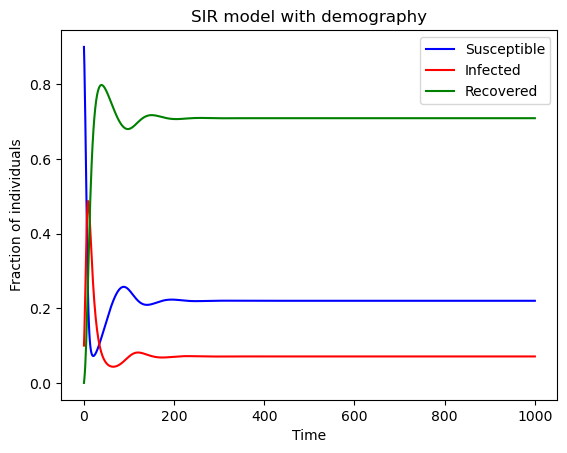

In [16]:
# Plot figures

plt.figure()
plt.title("SIR model with demography")
plt.plot(t_2a, S_2a, 'b', label='Susceptible')
plt.plot(t_2a, I_2a, 'r', label='Infected')
plt.plot(t_2a, R_2a, 'g', label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of individuals')
plt.legend()

plt.show;

We have introduced the natural birth and death rate mu into our model, for now we assume death and birth rate are equal such that N stays constant. This causes the fraction of infected people to display oscillatory behaviour, when R_0 = beta/(gamma + mu) > 1?

# Problem 2.2

In [17]:
# Define the SIR model equations with demography and infection induced mortality term

def sir_model_2b(q, t, beta, gamma, mu, nu):
    
    S, I, R = q
    
    dSdt = mu - beta*S*I - mu*S
    dIdt = beta*S*I - gamma*I - mu*I - nu*I
    dRdt = gamma*I - mu*R
    
    dqdt = [dSdt, dIdt, dRdt]
    
    return dqdt

In [18]:
# Solve model with numerical integration

t_2b = np.linspace(0, 10, 10)

sol_2b = odeint(sir_model_2b, (0.7, 0.3, 0), t_2b, (0.5, 0.1, 0.01, 0.9))

S_2b = sol_2b[:,0]
I_2b = sol_2b[:,1]
R_2b = sol_2b[:,2]
N_2b = S_2b + I_2b + R_2b

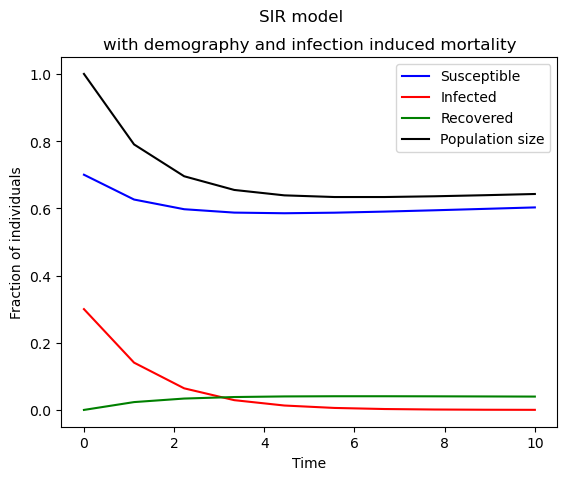

In [19]:
# Plot figures

plt.figure()
plt.suptitle("SIR model")
plt.title("with demography and infection induced mortality")
plt.plot(t_2b, S_2b, 'b', label='Susceptible')
plt.plot(t_2b, I_2b, 'r', label='Infected')
plt.plot(t_2b, R_2b, 'g', label='Recovered')
plt.plot(t_2b, N_2b, 'black', label='Population size')
plt.xlabel('Time')
plt.ylabel('Fraction of individuals')
plt.legend()

plt.show;

As the infection induced mortality rate approaches 1, we approach a disease free state with a smaller population.

# Problem 3.1 (not finished)

We will now look at a variant of the SIR model called the SEIR model (with demography) (Matt J. Keeling, Pejman Rohani - Modeling Infectious Diseases in Humans and Animals, section 2.5 (page 41)). We add a parameter sigma, where 1/sigma is the latent period.

In [20]:
# Define the SEIR model equations with demography

def sir_model_3a(q, t, beta, gamma, sigma, mu):
    
    S, E, I, R = q
    
    dSdt = mu - beta*S*I - mu*S
    dEdt = beta*S*I - mu*E - sigma*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I - mu*R
    
    dqdt = [dSdt, dEdt, dIdt, dRdt]
    
    return dqdt

In [44]:
# Solve model with numerical integration

t_3a = np.linspace(0, 100, 1000)

sol_3a = odeint(sir_model_3a, (0.7, 0, 0.3, 0), t_3a, (0.5, 0.1, 0.1, 0.01))

S_3a = sol_3a[:,0]
E_3a = sol_3a[:,1]
I_3a = sol_3a[:,2]
R_3a = sol_3a[:,3]

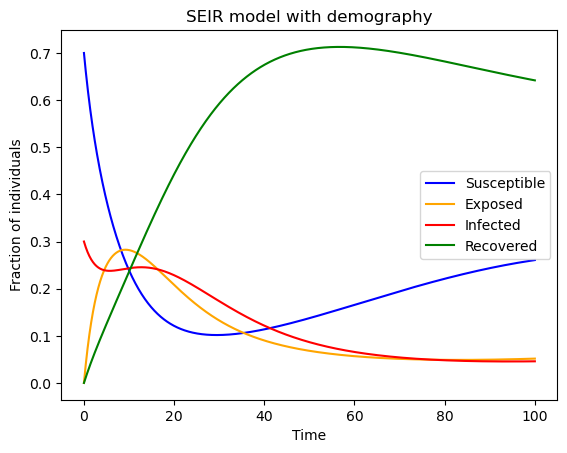

In [45]:
# Plot figures

plt.figure()
plt.title("SEIR model with demography")
plt.plot(t_3a, S_3a, 'b', label='Susceptible')
plt.plot(t_3a, E_3a, 'orange', label='Exposed')
plt.plot(t_3a, I_3a, 'r', label='Infected')
plt.plot(t_3a, R_3a, 'g', label='Recovered')
plt.xlabel('Time')
plt.ylabel('Fraction of individuals')
plt.legend()

plt.show;

Note: the larger sigma (shorter exposed phase), model similar to SIR. For small sigma -> less of a peak in infections.

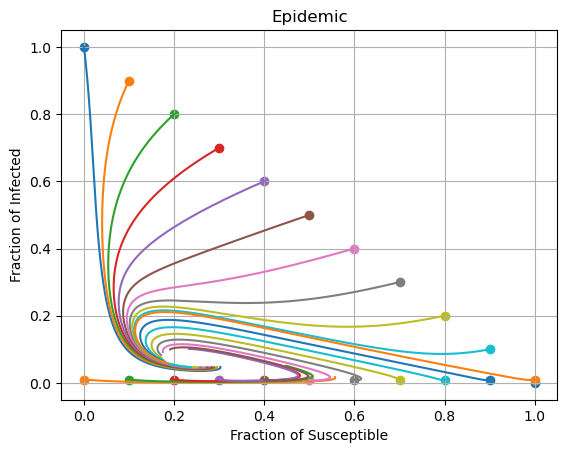

In [46]:
# Phase space diagram

initial_conditions = []
for i in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    S0 = i
    E0 = 0.0
    I0 = 1.0 - i
    R0 = 0.0
    initial_conditions.append((S0, E0, I0, R0))

for j in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    S0 = j
    E0 = 0.0
    I0 = 0.01
    R0 = 1-j-0.01
    initial_conditions.append((S0, E0, I0, R0))
        
for condition in initial_conditions:
    S0 = condition[0]
    E0 = condition[1]
    I0 = condition[2]
    R0 = condition[3]
    q0 = [S0, E0, I0, R0]
    solution = odeint(sir_model_3a, q0, t_3a, (0.5, 0.1, 0.1, 0.01))
    S, E, I, R = solution.T
    plt.scatter(S0, I0, marker='o')
    plt.plot(S, I)

plt.title('?')
plt.xlabel('Fraction of Susceptible')
plt.ylabel('Fraction of Infected')
plt.grid()

plt.show()

# Problem 3.2 (not finished)